# Лабораторная работа №8
##  Метод прогонки.
---  
### Цель: Исследовать решение стационарного одномерного уравнения теплопроводности, используя метода прогонки
---
#### Для исследования выберем Лаб раб 4, Вариант 3, Задание №7:  

$$
\begin{cases}
u(0) = 0; ~~~ u(1) = 1; ~~~ x_0 = \frac{1}{\sqrt{2}}, \\
k(x) = e^{\sin(x)}; ~~~ q(x) = 2; ~~~ f(x) = e^{x}, ~~~ x < x_0, \\
k(x) = 1; ~~~ q(x) = 1; ~~~ f(x) = e^{x}, ~~~ x > x_0, \\ 
\end{cases}
$$

Модельная задача:

$$
k(x) = k(x_0); ~~~ q(x) = q(x_0); ~~~ f(x) = f(x_0);
$$

---

#### Испорт модулей:

In [1]:
#!/bin/python 
import math
import numpy as np
from matplotlib import pyplot as plt

#### Объявление функций: 

In [2]:

num_iters = 10000
x_0 = 1 / math.sqrt(2)

def k(x):
    if (x < x_0):
        return math.exp(math.sin(x))
    return 1

def q(x):
    if (x < x_0):
       return 2
    return 1

def f(x):
    return math.exp(x)

class LinearEq:
  def __init__(self, coeff_1, coeff_2, coeff_3, rhs):
    self.coeff_1 = coeff_1
    self.coeff_2 = coeff_2
    self.coeff_3 = coeff_3
    self.rhs = rhs

def create_linear_system(num, step):
    eqs = []
    for i in range(num + 1):
        var = step * i
        step_mul_step = step * step
        coeff_1 = k(var + step / 2) / (step_mul_step)
        coeff_2 = ((-k(var + step / 2) - k(var - step / 2)) / (step_mul_step)) - q(var)
        coeff_3 = k(var - step / 2) / (step_mul_step)
        rhs = -f(var)
        eqs.append(LinearEq(coeff_1, coeff_2, coeff_3, rhs))
    return eqs

class Deps:
  def __init__(self, l, alpha, beta):
    self.l = l
    self.alpha = alpha
    self.beta = beta

def forward(eqs):
    deps = []
    deps.append(Deps(0, 0, 0))

    for i in range(1, num_iters):        
        coeff_1 = eqs[i].coeff_1
        coeff_2 = eqs[i].coeff_2
        coeff_3 = eqs[i].coeff_3 
        rhs = eqs[i].rhs
        alpha = - coeff_1 / (coeff_2 + coeff_3 * deps[-1].alpha)
        deps.append(Deps(i, alpha, (rhs - coeff_3 * deps[-1].beta) / (coeff_2 + coeff_3 * deps[-1].beta)))
    return deps

def backward(num, deps):
    vals = np.empty(num + 1)
    vals[0] = 0.0
    vals[num_iters] = 1.0
    for i in range(num_iters - 1, -1, -1):
        vals[i] = deps[i].beta + deps[i].alpha * vals[i + 1]
    return vals

#### Основная часть

determine a step value: 
	step : 9.999000099990002e-05
----------------------------------
Transform differential equation to linear system
----------------------------------
calculating alpha and beta coeffs to start tridiagonal method...
----------------------------------
getting final values...
----------------------------------


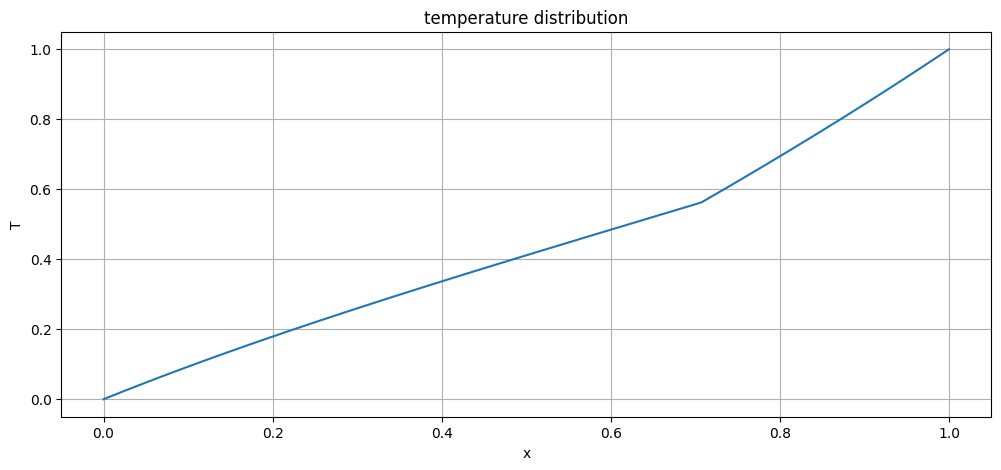

In [3]:

def main():
    print('determine a step value: ')
    step = (1 - 0) / (num_iters + 1)
    print('\tstep : ' + str(step))

    print("----------------------------------")

    print("Transform differential equation to linear system")
    eqs = create_linear_system(num_iters, step)
    
    print("----------------------------------")


    print('calculating alpha and beta coeffs to start tridiagonal method...')
    deps = forward(eqs)
    deps.append(Deps(0, 0, 0))

    print("----------------------------------")

    print('getting final values...')
    vals = backward(num_iters, deps)

    print("----------------------------------")

    plt.figure(figsize=[12, 5])
    x = np.arange(0.0, 1.0, step)
    plt.plot(x, vals)
    plt.xlabel("x")
    plt.ylabel("T")
    plt.title("temperature distribution")
    plt.grid()
    plt.show()
main()